In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aycha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aycha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aycha\AppData\Roaming\nltk_data...
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\aycha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


True

In [3]:
tweets_d = pd.read_csv('Data/tweets_disc_cleaned.csv')
tweets_c = pd.read_csv('Data/tweets_ctrl_cleaned.csv')
data = pd.concat([tweets_d])
data

,date,id,content,likes,retweets,disc_cat,Unnamed: 0.1,disc_cat_num
0,28 February 2023,1630587451436683264,bitch lmfaooooo gone rock sock ass,0,0,gender,NaN,2
1,28 February 2023,1630587450710958081,nvr vw person simpli cost repair hassl get don...,0,0,gender,NaN,2
2,28 February 2023,1630587450673319940,hate wen bitch say stop act care df said act l...,0,0,gender,NaN,2
3,28 February 2023,1630587450547634179,dnc pay well ask brooklyn dad hes lucki get pe...,0,0,gender,NaN,2
4,28 February 2023,1630587449503264769,sinong bitch ba yung hindi marunong mag sorri ...,0,0,gender,NaN,2
...,...,...,...,...,...,...,...,...
210913,28 February 2023,1630401406883561472,NaN,3,0,mental_health,105706.0,4
210914,28 February 2023,1630401254798118913,make sens,1,0,mental_health,105707.0,4
210915,28 February 2023,1630401175995527169,mean make sens miz host,0,0,mental_health,105708.0,4
210916,28 February 2023,1630400994222948352,disrespect key lime pieoh use lubric,1,0,mental_health,105709.0,4


In [4]:
print(data.dtypes)

date             object
id                int64
content          object
likes             int64
retweets          int64
disc_cat         object
Unnamed: 0.1    float64
disc_cat_num      int64
dtype: object


In [5]:
data['content'] =  data['content'].astype(str)

# MODELLING

## NLP 

### Creating the Corpus

In [6]:
contents = []
corpus = []
data['content'].dropna()
for tweet in data['content']:
    contents.append(tweet)
    corpus.append(nltk.sent_tokenize(tweet))


In [7]:
corpus

[['bitch lmfaooooo gone rock sock ass'],
 ['nvr vw person simpli cost repair hassl get done someth break solidifi disdain compani'],
 ['hate wen bitch say stop act care df said act lil bih'],
 ['dnc pay well ask brooklyn dad hes lucki get per check sinc hes part soy boy divorc angri bitch'],
 ['sinong bitch ba yung hindi marunong mag sorri gago ka nic'],
 ['nan'],
 ['mean son bitch pleas call us latinx offens'],
 ['nan'],
 ['googl bitch clown motherfuck better take sensit ass back myspac'],
 ['boss shut bitch'],
 ['bitch sus sinc day meet'],
 ['pep prove littl bitch'],
 ['use sweet innoc slow ass bitch'],
 ['last long'],
 ['yeahyou need retwist bitch'],
 ['start back bitch gone cri'],
 ['thank good block evil bitch earli time account forc follow either also sinc happen twitter must said follow alway mean endors'],
 ['bitch serious use art pull bitch lmfao'],
 ['flip fist bitch free vega xxxl carniv xl'],
 ['goat cannot knocc da hustl prize pick done bitch'],
 ['mug back bitch thought g

### Tokenizing the Corpus

In [8]:
wordfreq = {}
for tweet_list in corpus:
    if tweet_list:  # Check if the list is not empty
        tweet = tweet_list[0]  # assuming each inner list contains a single string
        words = tweet.split()
        for word in words:
            if word not in wordfreq:
                wordfreq[word] = 1
            else:
                wordfreq[word] += 1

In [9]:
len(list(wordfreq.keys()))

138466

In [10]:
wordfreq

{'bitch': 1618,
 'lmfaooooo': 17,
 'gone': 539,
 'rock': 309,
 'sock': 65,
 'ass': 2370,
 'nvr': 8,
 'vw': 6,
 'person': 5951,
 'simpli': 405,
 'cost': 332,
 'repair': 27,
 'hassl': 6,
 'get': 10660,
 'done': 1215,
 'someth': 2027,
 'break': 678,
 'solidifi': 7,
 'disdain': 12,
 'compani': 412,
 'hate': 2236,
 'wen': 41,
 'say': 6696,
 'stop': 2309,
 'act': 1135,
 'care': 1886,
 'df': 15,
 'said': 2869,
 'lil': 452,
 'bih': 16,
 'dnc': 14,
 'pay': 1090,
 'well': 3106,
 'ask': 1731,
 'brooklyn': 16,
 'dad': 500,
 'hes': 3952,
 'lucki': 197,
 'per': 563,
 'check': 1129,
 'sinc': 1359,
 'part': 1577,
 'soy': 387,
 'boy': 2455,
 'divorc': 203,
 'angri': 284,
 'sinong': 4,
 'ba': 280,
 'yung': 290,
 'hindi': 150,
 'marunong': 6,
 'mag': 181,
 'sorri': 1266,
 'gago': 18,
 'ka': 681,
 'nic': 20,
 'nan': 20685,
 'mean': 2901,
 'son': 1164,
 'pleas': 1901,
 'call': 6220,
 'us': 3496,
 'latinx': 31,
 'offens': 234,
 'googl': 216,
 'clown': 315,
 'motherfuck': 32,
 'better': 2242,
 'take': 3964,


In [11]:
stop_words = list(stopwords.words('english'))
stop_words.append(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will', 'wa', 'e', 'like', 'yo', 'bc', 'amp'])

In [12]:
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words]

# Reducing the Corpus

In [13]:
corpus.sort(reverse = True)

# keep the 1000 most frequent words
corpus_freq = [(word[1],word[0]) for word in corpus[:1000]] 
corpus_freq = corpus_freq[1:]
corpus_freq

[('man', 11953),
 ('get', 10660),
 ('peopl', 9678),
 ('one', 9369),
 ('que', 8359),
 ('go', 7722),
 ('think', 7038),
 ('make', 6930),
 ('know', 6915),
 ('say', 6696),
 ('want', 6450),
 ('would', 6373),
 ('need', 6326),
 ('look', 6247),
 ('call', 6220),
 ('person', 5951),
 ('time', 5923),
 ('woman', 5706),
 ('guy', 5382),
 ('la', 5312),
 ('love', 5284),
 ('men', 5282),
 ('na', 5170),
 ('women', 5092),
 ('good', 5048),
 ('see', 5029),
 ('even', 4891),
 ('crazi', 4520),
 ('got', 4430),
 ('use', 4418),
 ('thing', 4372),
 ('mental', 4320),
 ('girl', 4236),
 ('cannot', 4103),
 ('day', 4021),
 ('take', 3964),
 ('hes', 3952),
 ('way', 3887),
 ('still', 3882),
 ('right', 3807),
 ('year', 3790),
 ('feel', 3784),
 ('also', 3761),
 ('en', 3736),
 ('never', 3710),
 ('realli', 3699),
 ('come', 3608),
 ('tri', 3572),
 ('fuck', 3537),
 ('back', 3521),
 ('insan', 3519),
 ('us', 3496),
 ('masculin', 3398),
 ('work', 3397),
 ('el', 3382),
 ('se', 3252),
 ('much', 3213),
 ('white', 3180),
 ('well', 3106),

In [14]:
cols = {word[0]: [] for word in corpus_freq}
tweets = pd.DataFrame(cols)

tweets

,man,get,peopl,one,que,go,think,make,know,say,...,toward,three,smoke,mouth,goal,assum,prison,omega,nada,finish


In [15]:
import nltk
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

def tweet_inspector(sentence, stop_words, words):

    # Decompose the review in words -> tokens
    tokens = nltk.word_tokenize(sentence)
    # Cleanup the tokens
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        tokens[i] = re.sub(r'\W',' ',tokens[i]) # Replace everything non-alpahnumeric by ' '
        tokens[i] = re.sub(r'\s+','',tokens[i]) # Replace one or more whitespaces by  ' '
        tokens[i] = re.sub(r'\d+','',tokens[i]) # Replace one or more digits by  ' '
        tokens[i] = lem.lemmatize(tokens[i])
        
    # Droping tokens which are "stopwords" or empty
    tokens = [ token for token in tokens if (token not in stop_words and token != '')]

    # Initializing an empty dictionary of word frequencies for the corresponding review
    col_freq = {col:0 for col in words}
    
    # Filling the dictionary with word frequencies in the review
    for token in tokens:
        if token in words:
            col_freq[token] += 1

    return col_freq

In [21]:
nltk.download('omw-1.4')
tweet_list = list( map(tweet_inspector, data['content'], 
                    [stop_words]*data.shape[0], [list(cols.keys())]*data.shape[0] ) )

tweet_list[:2]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aycha\AppData\Roaming\nltk_data...


[{'man': 0,
  'get': 0,
  'peopl': 0,
  'one': 0,
  'que': 0,
  'go': 0,
  'think': 0,
  'make': 0,
  'know': 0,
  'say': 0,
  'want': 0,
  'would': 0,
  'need': 0,
  'look': 0,
  'call': 0,
  'person': 0,
  'time': 0,
  'woman': 0,
  'guy': 0,
  'la': 0,
  'love': 0,
  'men': 0,
  'na': 0,
  'women': 0,
  'good': 0,
  'see': 0,
  'even': 0,
  'crazi': 0,
  'got': 0,
  'use': 0,
  'thing': 0,
  'mental': 0,
  'girl': 0,
  'cannot': 0,
  'day': 0,
  'take': 0,
  'hes': 0,
  'way': 0,
  'still': 0,
  'right': 0,
  'year': 0,
  'feel': 0,
  'also': 0,
  'en': 0,
  'never': 0,
  'realli': 0,
  'come': 0,
  'tri': 0,
  'fuck': 0,
  'back': 0,
  'insan': 0,
  'us': 0,
  'masculin': 0,
  'work': 0,
  'el': 0,
  'se': 0,
  'much': 0,
  'white': 0,
  'well': 0,
  'let': 0,
  'shit': 0,
  'mean': 0,
  'black': 0,
  'said': 0,
  'someon': 0,
  'life': 0,
  'doesnt': 0,
  'talk': 0,
  'give': 0,
  'gay': 0,
  'lol': 0,
  'male': 0,
  'could': 0,
  'live': 0,
  'alway': 0,
  'actual': 0,
  'everi':

In [23]:
tweets = pd.DataFrame(tweet_list)

In [24]:
tweets['disc_cat_num'] = data['disc_cat_num'].reset_index(drop=True)


In [25]:
tweets

,man,get,peopl,one,que,go,think,make,know,say,...,three,smoke,mouth,goal,assum,prison,omega,nada,finish,disc_cat_num
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
210914,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
210915,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
210916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


# X/Y split

In [26]:
X= tweets.drop(columns=['disc_cat_num'])
y= tweets['disc_cat_num']

# train / test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns =['disc_cat_num'])
y_test  = pd.DataFrame(y_test, columns =['disc_cat_num'])

<AxesSubplot:xlabel='disc_cat_num', ylabel='count'>

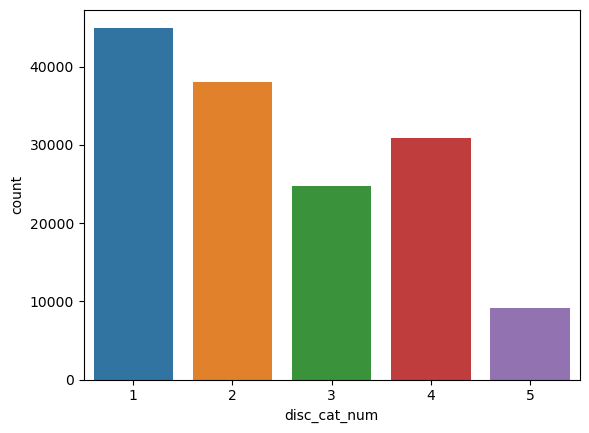

In [28]:
sns.countplot(x=y_train['disc_cat_num'])

<AxesSubplot:xlabel='disc_cat_num', ylabel='count'>

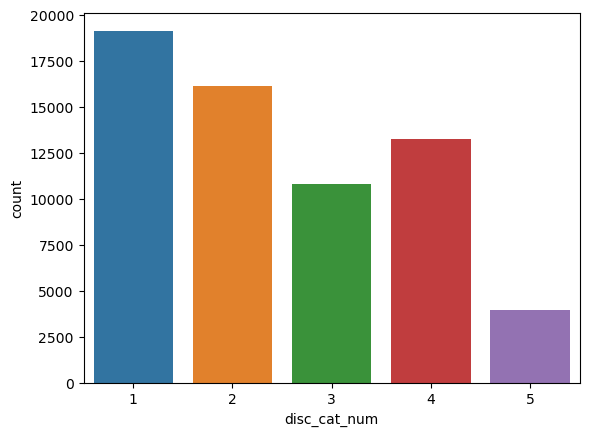

In [29]:
sns.countplot(x=y_test['disc_cat_num'])

# Class balancing

In [30]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

X_train_res = pd.DataFrame(X_train_res, columns= X_train.columns)
y_train_res = pd.DataFrame(y_train_res, columns =['disc_cat_num'])

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
sns.countplot(x=y_train_res['disc_cat_num'])

In [ ]:
y_train_res.value_counts()

# TF - IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf=TfidfVectorizer(max_features=5000)

In [33]:
x_train_tfidf=tfidf.fit_transform(X_train)
x_test_tfidf=tfidf.transform(X_test)

In [34]:
print(x_train_tfidf)

  (0, 526)	1.0
  (1, 350)	1.0
  (2, 645)	1.0
  (3, 621)	1.0
  (4, 707)	1.0
  (5, 357)	1.0
  (6, 873)	1.0
  (7, 524)	1.0
  (8, 466)	1.0
  (9, 758)	1.0
  (10, 939)	1.0
  (11, 972)	1.0
  (12, 588)	1.0
  (13, 508)	1.0
  (14, 117)	1.0
  (15, 650)	1.0
  (16, 879)	1.0
  (17, 962)	1.0
  (18, 374)	1.0
  (19, 469)	1.0
  (20, 514)	1.0
  (21, 546)	1.0
  (22, 577)	1.0
  (23, 963)	1.0
  (24, 364)	1.0
  :	:
  (974, 205)	1.0
  (975, 825)	1.0
  (976, 773)	1.0
  (977, 637)	1.0
  (978, 862)	1.0
  (979, 820)	1.0
  (980, 212)	1.0
  (981, 44)	1.0
  (982, 42)	1.0
  (983, 684)	1.0
  (984, 654)	1.0
  (985, 660)	1.0
  (986, 602)	1.0
  (987, 193)	1.0
  (988, 902)	1.0
  (989, 890)	1.0
  (990, 877)	1.0
  (991, 806)	1.0
  (992, 566)	1.0
  (993, 358)	1.0
  (994, 55)	1.0
  (995, 688)	1.0
  (996, 619)	1.0
  (997, 578)	1.0
  (998, 317)	1.0


In [35]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_tfidf=x_train_tfidf.toarray()
scaled_x_train=scale.fit_transform(x_train_tfidf)
x_test_tfidf=x_test_tfidf.toarray()
scaled_x_test=scale.transform(x_test_tfidf)

# PCA

In [36]:
# Reducing the number of features to check how the cumulative explained varience changes.
from sklearn.decomposition import PCA
pca=PCA()
reduced_train=pca.fit_transform(scaled_x_train)
pca.explained_variance_ratio_.size

990

In [37]:
varience_explained=np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative explained variance')

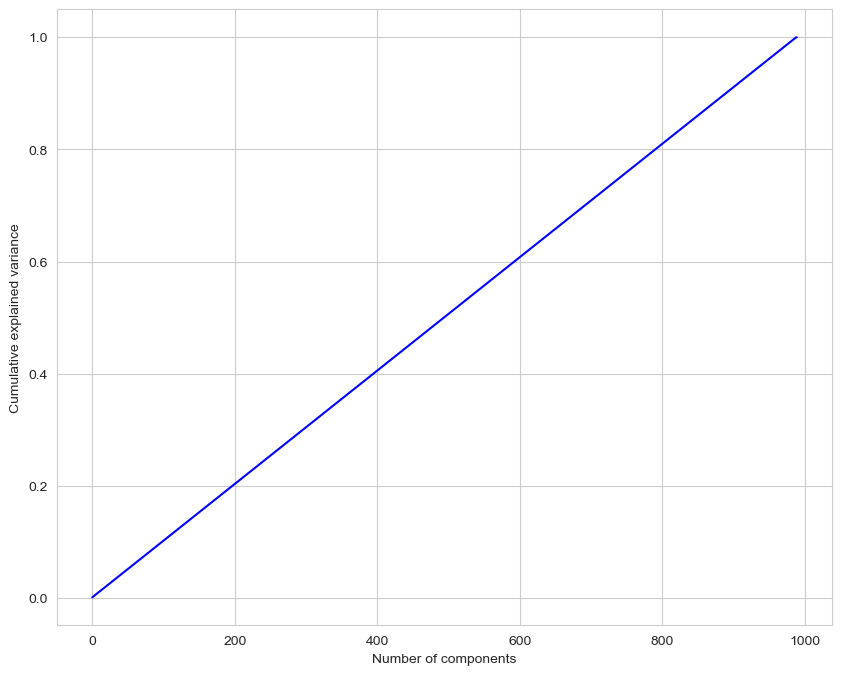

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
plt.plot(varience_explained,color='b')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [39]:
final_pca=PCA(0.9)
final_reduced_x_train=final_pca.fit_transform(x_train_tfidf)

In [40]:
final_reduced_x_test=final_pca.transform(x_test_tfidf)

# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier



rf = RandomForestClassifier(max_depth=100, n_estimators=50)

y_train = y_train.astype('int')
y_test  = y_test.astype('int')

rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf  = rf.predict(X_test)

C:\Users\aycha\AppData\Local\Temp\ipykernel_9676\3537038126.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [42]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [43]:
model_performance_class(y_train, y_train_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.56
              precision    recall  f1-score   support

           1       0.49      0.99      0.65     44983
           2       0.98      0.58      0.73     37978
           3       0.97      0.31      0.46     24773
           4       0.98      0.63      0.76     30820
           5       0.99      0.67      0.80      9088

    accuracy                           0.68    147642
   macro avg       0.88      0.63      0.68    147642
weighted avg       0.83      0.68      0.67    147642

Results obtained for the TEST SET
The Cohen's Kappa is: 0.52
              precision    recall  f1-score   support

           1       0.47      0.97      0.64     19144
           2       0.94      0.55      0.69     16130
           3       0.94      0.27      0.42     10796
           4       0.94      0.62      0.74     13268
           5       0.97      0.65      0.78      3938

    accuracy                           0.65     63276
   macro

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

C:\Users\aycha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aycha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(log_model.predict(X_train), y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(log_model.predict(X_test), y_test)*100))
print("Precision       : {:.2f} %".format(precision_score(log_model.predict(X_test), y_test,average='macro')*100))
print("Recall          : {:.2f} %".format(recall_score(log_model.predict(X_test), y_test,average='macro')*100))

Train Accuracy  : 67.10 %
Test Accuracy   : 65.92 %
Precision       : 63.34 %
Recall          : 74.80 %
